$\newcommand{\si}{\sigma}
\newcommand{\al}{\alpha}
\newcommand{\tta}{\theta}
\newcommand{\Tta}{\Theta}
\newcommand{\Si}{\Sigma}
\newcommand{\ld}{\ldots}
\newcommand{\cd}{\cdots}
\newcommand{\cN}{\mathcal{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\p}{\mathbb{P}}
\newcommand{\f}{\frac}
\newcommand{\ff}{\frac{1}}
\newcommand{\ds}{\displaystyle}
\newcommand{\bE}{\mathbf{E}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\bF}{\mathbf{F}}
\newcommand{\ii}{\mathrm{i}}
\newcommand{\me}{\mathrm{e}}
\newcommand{\hsi}{\hat{\sigma}}
\newcommand{\hmu}{\hat{\mu}}
\newcommand{\ste}{\, ;\, }
\newcommand{\op}{\operatorname} 
\newcommand{\argmax}{\op{argmax}}
\newcommand{\lfl}{\lfloor}
\newcommand{\ri}{\right}
\newcommand{\supp}{\operatorname{supp}}
$

<a href="https://colab.research.google.com/github/joanglaunes/algosto/blob/master/python/TP_MCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
# TP Introduction MCMC

On commence par importer les librairies qui nous serons utiles dans le TP.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from time import time

In [2]:
from TP_MCMC import *

## Metropolis-Hasting versus rejet

### Rappel sur l'algorithme de rejet
Soit $f$ la densité sous laquelle on cherche à  simuler, appelée *densité cible*. On considère une autre densité $g$ (par rapport à  $\mu$), appelée *densité de proposition*, telle que:
- il est aisé de simuler suivant $g$,
- il existe une constante $M$ telle que $f(x)\leq M g(x)$ pour tout $x$ (ce qui implique que $M\ge 1$ et $\supp (f) \subset \supp(g)$). 

On peut alors générer   un échantillon suivant l'algorithme suivant:

**Algorithme de rejet de simulation de $X$ de densité $f$**
1. Générer $X$ suivant la densité $g$.
2. Générer $U$ suivant une loi $\mathcal{U}([0,M])$
3. Accepter  la valeur $X$ si $U\le \frac{f(X)}{ g(X)}$, sinon, recommencer.

### Algorithme de Metropolis Hasting

On a par ailleurs vu en cours l'algorithme de Metropolis-Hasting.
Soit   $f$ une densité de probabilité sur $\R^d$. Posons $\supp_{>}(f):= {\{x\ste f(x)> 0\}}$.

**Algorithme de Metropolis-Hastings de simulation de $X$ de densité $\approx f$**

1. Choisir un noyau de transition $Q$ irréductible apériodique sur  $\supp_{>}(f)$.
2. Choisir $x\in \supp_{>}(f)$.
3. Répéter un grand nombre de fois :
    + tirer, indépendamment, $Y\sim Q(x,\cdot)$ et $U\sim\mathcal{U}([0,1])$,
    + remplacer $x$ par $Y$ si $U <\rho(x,Y)$ et le laisser invariant sinon, où $$\rho(x,y):= \f{f(y)Q(x,y)}{f(x)Q(y,x)}.$$
4. Retourner $X:=x$.

Remarque : on a vu en cours que $\rho$ devait plutôt s'écrire $\min(1,\f{f(y)Q(x,y)}{f(x)Q(y,x)})$, mais comme dans l'algorithme on va utiliser $\rho$ uniquement dans l'étape 2 de l'algorithme et que $U$ est toujours inférieur à 1, on peut se contenter de choisir $\rho$ comme plus haut.

### Exercice
Le but ici est de générer des échantillons selon la loi sur $\R$ de densité :
$$\pi_\al(x) =\ff{\sqrt{2\pi}} \me^{-x^2/2}(1 + \sin(\al x))\,$$
où $\al>0$ (on pourra prendre $\al=2$).

**Question 1** : Tracer la densité $\pi_\al$ pour plusieurs valeurs de $\al$.  

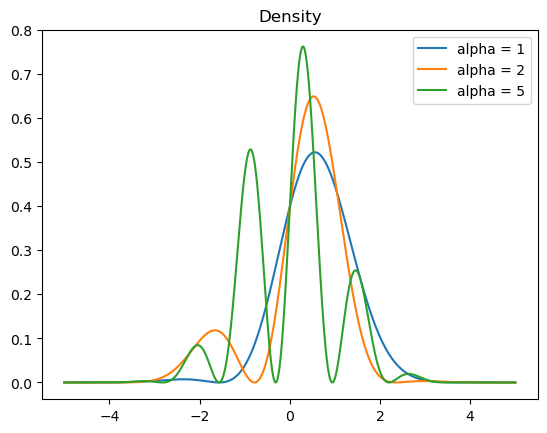

In [3]:
def f(x,alpha):
    return sps.norm.pdf(x)*(1+np.sin(alpha*x))

plt.figure()
x=np.linspace(-5,5,int(1e4))
for alpha in [1,2,5]:
    y=f(x,alpha)
    plt.plot(x,y,label='alpha = %s'%alpha)
plt.title("Density")
plt.legend()
plt.show()

**Question 2** :   Simuler un échantillon de taille $n=1000$ de vaiid de   loi de densité $\pi_\al$ via  la méthode de Metropolis Hasting avec une loi de proposition $Q(x,.)=\cN(x,\si^2)$ (pour $\si=1$ par exemple). On mesurera le temps T que prend la simulation avec la commande `time()` de la librairie `time`.

In [4]:
Nsteps = 20 # nombre d'itérations de l'algorithme
# en pratique il faudrait plus d'échantillons pour bien converger, mais cela prendrait trop de temps
# on prend donc Nsteps=20 ici et on initialise HM avec une loi initiale gaussienne ce qui permet de vite converger car elle ressemble à f
sigma = 1
alpha = 2

# On echantillonne 1000 fois avec la fonction HM (à écrire)
n=int(1e3)
Ech=[]        
t = time()   
for i in range(n):
    Ech.append(HM(Nsteps,sigma,alpha))
tempsHM=time()-t

# Estimation de l'espérance de la loi, 
mHM=np.mean(Ech)
eHM=1.96*np.std(Ech)/np.sqrt(n)
print("\nEstimation de la moyenne : "+str(mHM))
print("\nErreur sur l'estimation de la moyenne : "+str(eHM))
print("\nTemps nécessaire pour tirer 1000 echantillons: "+str(tempsHM))


Estimation de la moyenne : 0.17483162236420008

Erreur sur l'estimation de la moyenne : 0.06460838228941505

Temps nécessaire pour tirer 1000 echantillons: 1.865004062652588


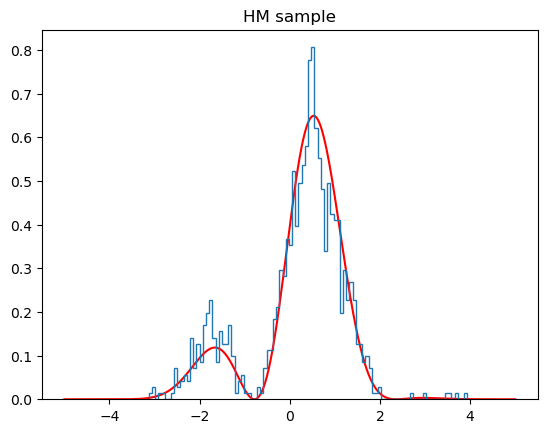

In [5]:
# affichage de l'histogramme des echantillons

alpha = 2
plt.figure()
x=np.linspace(-5,5,int(1e4))
y=f(x,alpha)
plt.plot(x,y,"r")
plt.hist(Ech, bins=100,density=1, histtype="step")
plt.title("HM sample")
plt.show()

**Question 3** : Simuler ensuite, en dédiant à la tâche le même temps T que pour la simulation précédente,  un échantillon par méthode de rejet (on notera que $\pi_\al(x)\le 2g(x)$ pour $g$ la densité de $\cN(0,1)$). 

**Question4** : Comparer les histogrammes et afficher le rapport entre les tailles des deux échantillons ainsi simulés. Quelle méthode permet de simuler le plus grand échantillon pendant le temps T ? 

**Question 5** :   Calculer ensuite la valeur théorique de l'espérance ainsi que sa valeur empirique calculée grâce aux deux méthodes.

In [6]:
# Echantillonnage pendant le même temps que pour HM
# Remarque : pour le rejet, on pourra remarquer que le quotient à calculer se simplifie, ce qui permet de faire un calcul très rapide   
Ech=[]  
t = time()  
while time()-t<tempsHM:
    Ech.append(Rejet(alpha))
    
m=len(Ech)    

print("Rapport nombre d'échantillons Rejet / HM pour le même temps de calcul : "+str(m/float(n)))

Rapport nombre d'échantillons Rejet / HM pour le même temps de calcul : 1184.865


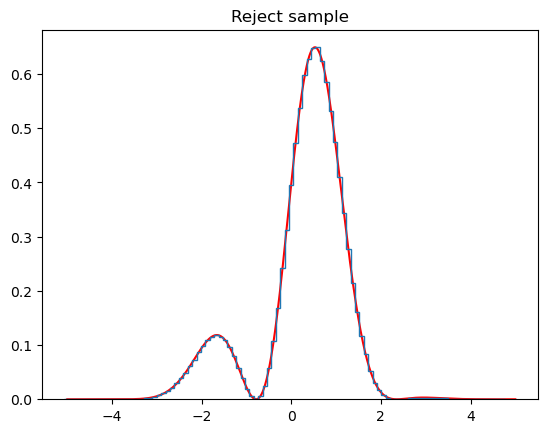


Estimation la moyenne :
Valeur reelle : 2.707e-01
Methode rejet : 2.717e-01 +/-1.733e-03
Methode HM : 1.748e-01 +/-6.461e-02


In [7]:
# Affichage de l'histogramme
plt.figure()
x=np.linspace(-5,5,int(1e4))
y=f(x,alpha)
plt.plot(x,y,"r")
plt.hist(Ech, bins=100,density=1, histtype="step")
plt.title("Reject sample")
plt.show()

# estimation de la moyenne
mR=np.mean(Ech)
eR=1.96*np.std(Ech)/np.sqrt(m)
mT = alpha*np.exp(-.5*alpha**2)
print("\nEstimation la moyenne :")
print("Valeur reelle : %.3e" % mT)
print("Methode rejet : %.3e +/-%.3e" % (mR,eR))
print("Methode HM : %.3e +/-%.3e" % (mHM,eHM))